In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE

print("Hello, World!")

Hello, World!


In [ ]:
# Load the student data prepared in the previous notebook, into a pandas dataframe
studentEncodedDf = pd.read_csv('../Data/studentEncoded.csv')
studentEncodedDf.head()
studentEncodedDf.info()


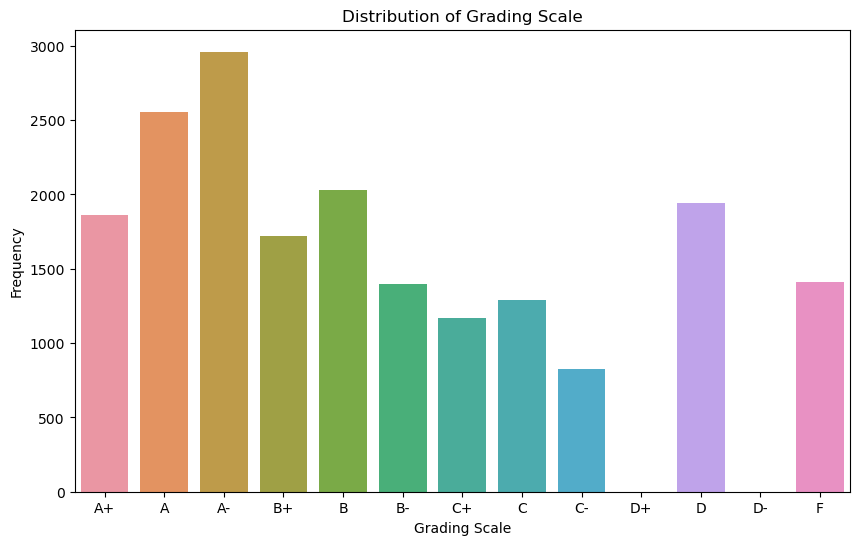

In [8]:
# Import the seaborn module
import seaborn as sns

# Plot the distribution of the target variable (grading_scale) having the x variables in the following order:
# A+, A, A-, B+, B, B-, C+, C, C-, D+, D, D-, F
# The plot should have the following properties:
# - Title: Distribution of Grading Scale
# - X-axis label: Grading Scale
# - Y-axis label: Frequency
# - X-axis tick labels: A+, A, A-, B+, B, B-, C+, C, C-, D+, D, D-, F

# Define the order of the x variables
order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']

# Create a countplot with the specified order
plt.figure(figsize=(10,6))
sns.countplot(x='grading_scale', data=studentEncodedDf, order=order)

# Set the title and labels
plt.title('Distribution of Grading Scale')
plt.xlabel('Grading Scale')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [10]:
# Check if the specified grades are present in the index of the 'grading_scale' column
grades = ['D+', 'D-']
if all(grade in studentEncodedDf['grading_scale'].unique() for grade in grades):
    print(studentEncodedDf['grading_scale'].value_counts()[grades])
else:
    print("Specified grades not found in the 'grading_scale' column.")


Specified grades not found in the 'grading_scale' column.


- There are no D+ and D- grades;
- The categories to predict are: A+,A,A-,B+,B,B-,C+,C,C-,D,F

## Discover Factors Affecting Grades

In [ ]:
# Find out how much data is available per drading_scale and print it out:

Aplus_df = studentEncodedDf[(studentEncodedDf.grading_scale == "A+")]
A_df= studentEncodedDf[(studentEncodedDf.grading_scale == "A")]
Aminus_df= studentEncodedDf[(studentEncodedDf.grading_scale == "A-")]

Bplus_df = studentEncodedDf[(studentEncodedDf.grading_scale == "B+")]
B_df= studentEncodedDf[(studentEncodedDf.grading_scale == "B")]
Bminus_df= studentEncodedDf[(studentEncodedDf.grading_scale == "B-")]

Cplus_df = studentEncodedDf[(studentEncodedDf.grading_scale == "C+")]
C_df= studentEncodedDf[(studentEncodedDf.grading_scale == "C")]
Cminus_df= studentEncodedDf[(studentEncodedDf.grading_scale == "C-")]

D_df= studentEncodedDf[(studentEncodedDf.grading_scale == "D")]

F_df= studentEncodedDf[(studentEncodedDf.grading_scale == "F")]


print(f'A+ df: {Aplus_df.shape}')
print(f'A df: {A_df.shape}')
print(f'A- df: {Aminus_df.shape}')

print(f'B+ df: {Bplus_df.shape}')
print(f'B df: {B_df.shape}')
print(f'B- df: {Bminus_df.shape}')

print(f'C+ df: {Cplus_df.shape}')
print(f'C df: {C_df.shape}')
print(f'C- df: {Cminus_df.shape}')

print(f'D df: {D_df.shape}')
print(f'F df: {F_df.shape}')




In [12]:
def create_factor_df(df):
    factor_df = df.T.drop(['grading_scale']).sum(axis=1).to_frame('value')
    factor_df = factor_df[(factor_df.T != 0).any()]
    factor_df = factor_df.sort_values(by='value', ascending=False,
    inplace=False)
    return factor_df

Text(0.5, 1.0, 'A+ top most influential factors')

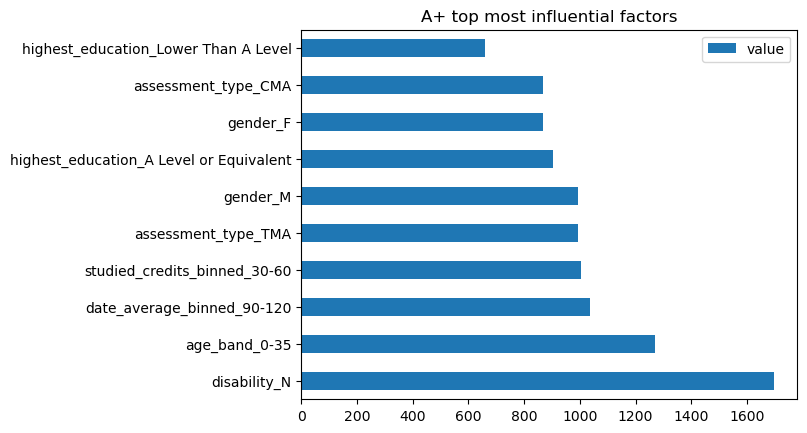

In [35]:
# Call create_factor_df() and plot it calling barh() for each grade. Start with A+ and end with F
# Plot the 10 top most inluential factors for each grade

# Plot 10 top most influential factors for A+
Aplus_factor_df = create_factor_df(Aplus_df)
Aplus_factor_df.head(10).plot.barh()
plt.title("A+ top most influential factors")

Text(0.5, 1.0, 'A top most influential factors')

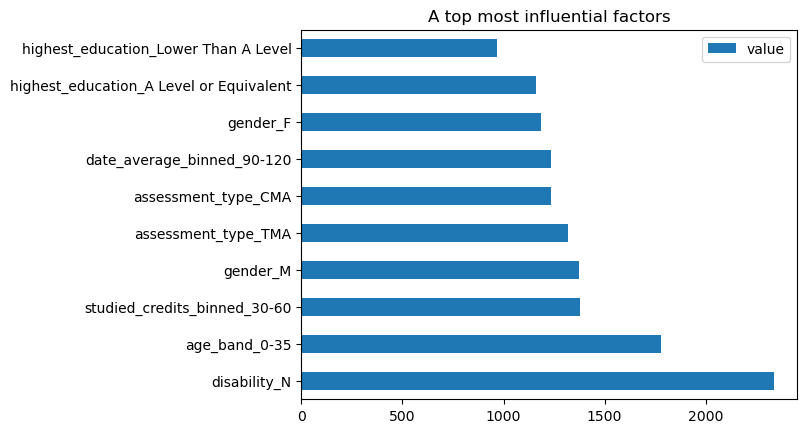

In [34]:
# Plot 10 top most influential factors for A
A_factor_df = create_factor_df(A_df)
A_factor_df.head(10).plot.barh()
plt.title("A top most influential factors")

Text(0.5, 1.0, 'A- top most influential factors')

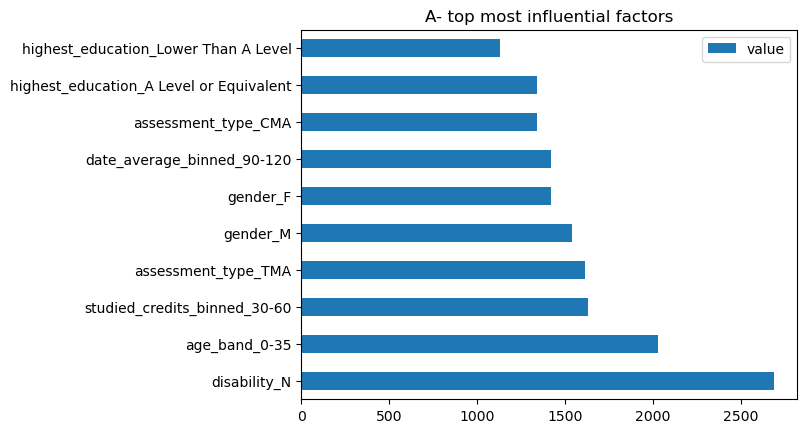

In [33]:
# Plot 10 top most influential factors for A-
Aminus_factor_df = create_factor_df(Aminus_df)
Aminus_factor_df.head(10).plot.barh()
plt.title("A- top most influential factors")

Text(0.5, 1.0, 'B+ top most influential factors')

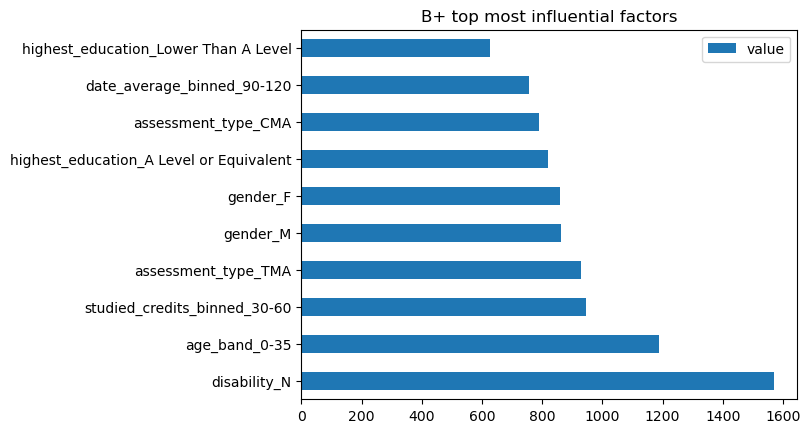

In [32]:
# Plot 10 top most influential factors for B+
Bplus_factor_df = create_factor_df(Bplus_df)
Bplus_factor_df.head(10).plot.barh()
plt.title("B+ top most influential factors")

Text(0.5, 1.0, 'B top most influential factors')

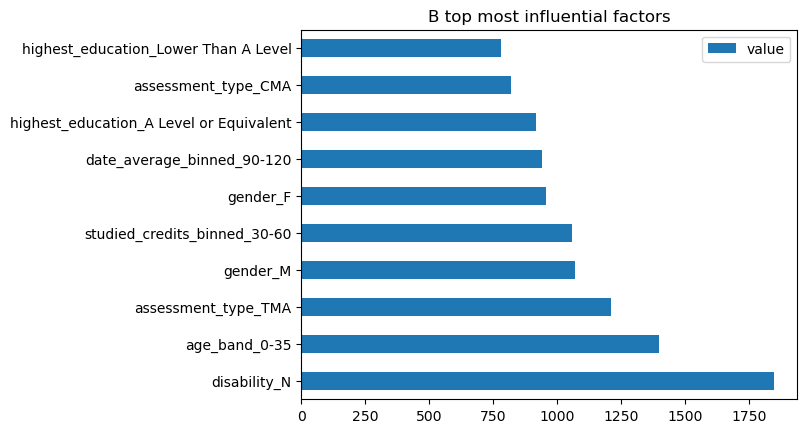

In [31]:
# Plot 10 top most influential factors for B
B_factor_df = create_factor_df(B_df)
B_factor_df.head(10).plot.barh()
plt.title("B top most influential factors")

Text(0.5, 1.0, 'B- top most influential factors')

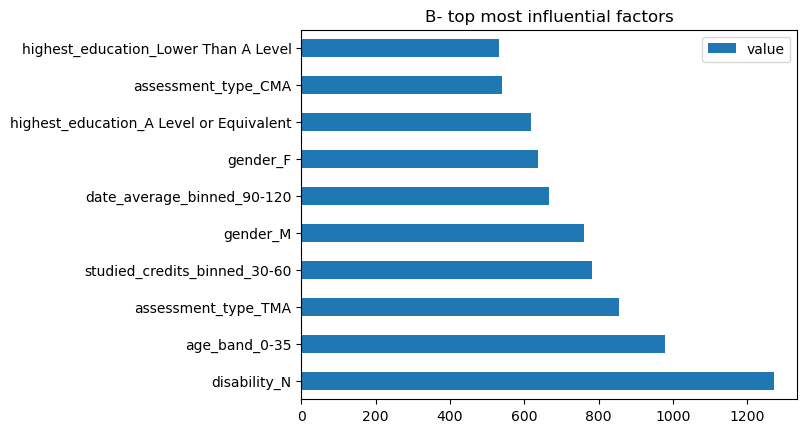

In [30]:
# Plot 10 top most influential factors for B-
Bminus_factor_df = create_factor_df(Bminus_df)
Bminus_factor_df.head(10).plot.barh()
plt.title("B- top most influential factors")

Text(0.5, 1.0, 'C+ top most influential factors')

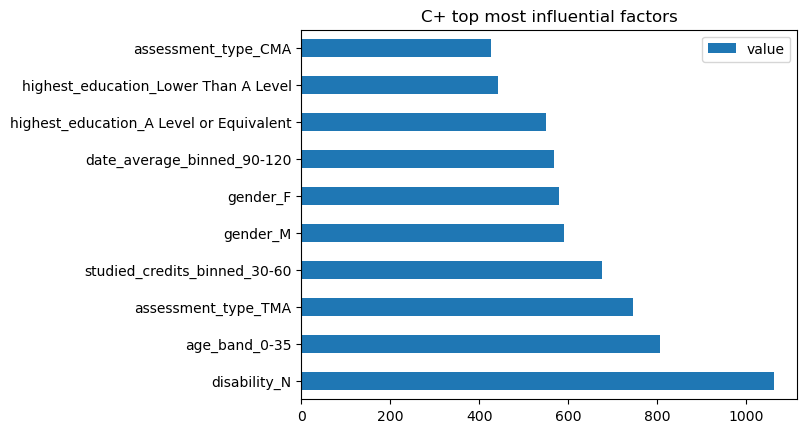

In [29]:
# Plot 10 top most influential factors for C+
Cplus_factor_df = create_factor_df(Cplus_df)
Cplus_factor_df.head(10).plot.barh()
plt.title("C+ top most influential factors")

Text(0.5, 1.0, 'C top most influential factors')

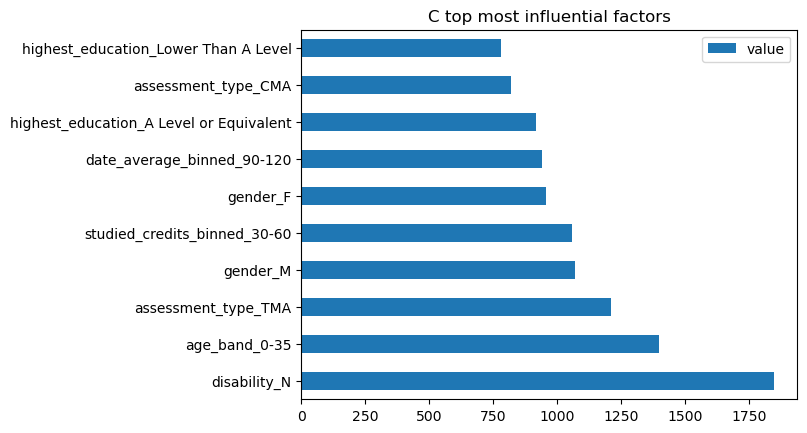

In [28]:
# Plot 10 top most influential factors for C
C_factor_df = create_factor_df(B_df)
C_factor_df.head(10).plot.barh()
plt.title("C top most influential factors")

Text(0.5, 1.0, 'C- top most influential factors')

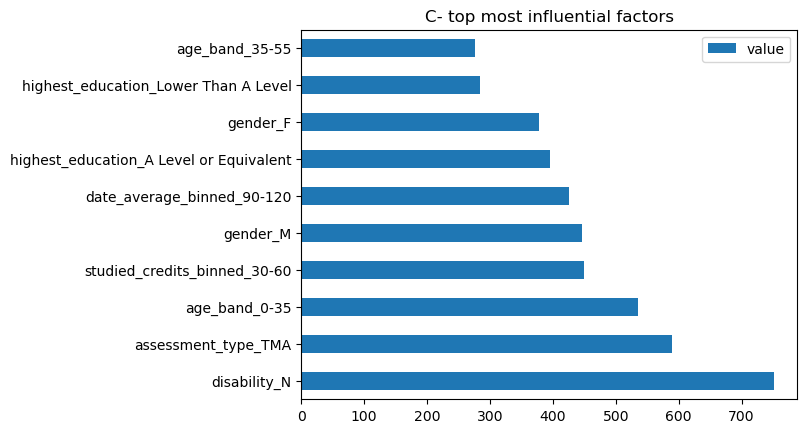

In [27]:
# Plot 10 top most influential factors for C-
Cminus_factor_df = create_factor_df(Cminus_df)
Cminus_factor_df.head(10).plot.barh()
plt.title("C- top most influential factors")

Text(0.5, 1.0, 'D - top most influential factors')

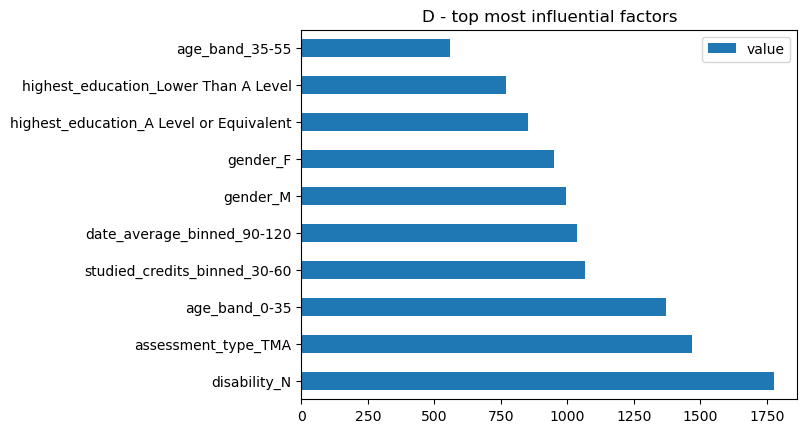

In [24]:
# Plot 10 top most influential factors for D
D_factor_df = create_factor_df(D_df)
D_factor_df.head(10).plot.barh()
plt.title("D - top most influential factors")


Text(0.5, 1.0, 'F - top most influential factors')

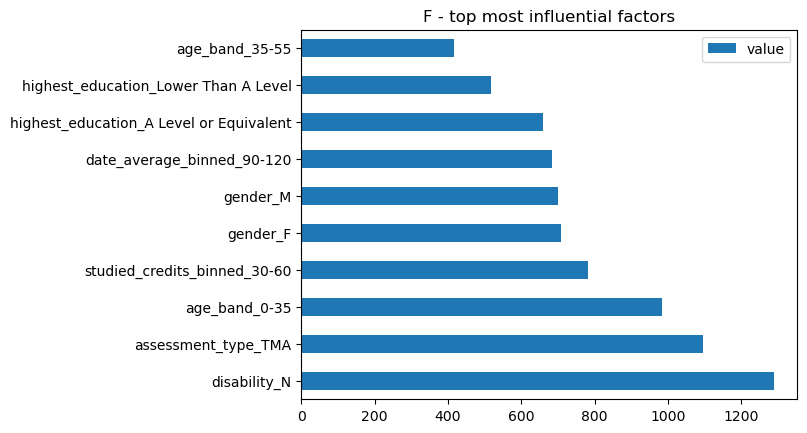

In [25]:
# Plot 10 top most influential factors for F
F_factor_df = create_factor_df(F_df)
F_factor_df.head(10).plot.barh()
plt.title("F - top most influential factors")

In [37]:
# Print the column list of the dataframe, each column per line
for column in A_df.columns:
    print(column)



grading_scale
gender_F
gender_M
region_East Anglian Region
region_East Midlands Region
region_Ireland
region_London Region
region_North Region
region_North Western Region
region_Scotland
region_South East Region
region_South Region
region_South West Region
region_Wales
region_West Midlands Region
region_Yorkshire Region
highest_education_A Level or Equivalent
highest_education_HE Qualification
highest_education_Lower Than A Level
highest_education_No Formal quals
highest_education_Post Graduate Qualification
imd_band_0-10%
imd_band_10-20
imd_band_20-30%
imd_band_30-40%
imd_band_40-50%
imd_band_50-60%
imd_band_60-70%
imd_band_70-80%
imd_band_80-90%
imd_band_90-100%
age_band_0-35
age_band_35-55
age_band_55<=
disability_N
disability_Y
assessment_type_CMA
assessment_type_Exam
assessment_type_TMA
studied_credits_binned_0-30
studied_credits_binned_30-60
studied_credits_binned_60-90
studied_credits_binned_90-120
studied_credits_binned_120-150
studied_credits_binned_150-180
studied_credits_bin

The following columns are present in top 10 for all grading values:
- disability_N
- assessment_type_TMA
- age_band_0-35
- studied_credits_binned_30-60
- gender_F
- gender_M
- date_average_binned_90-120
- highest_education_A Level or Equivalent
- highest_education_Lower Than A Level

We will drop the most common factors that create confusion between distinct grades, by calling drop();
Then we will separate the labels and features

In [ ]:
# For features, drop the 9 columns that are not relevant for the analysis and the target variable "grading_scale"
featureStudents = studentEncodedDf.drop(['grading_scale','disability_N','assessment_type_TMA','age_band_0-35','studied_credits_binned_30-60', 
                           'gender_F', 'gender_M', 'date_average_binned_90-120', 'highest_education_A Level or Equivalent', 'highest_education_Lower Than A Level'], axis=1)
labelsGrades = studentEncodedDf.grading_scale #.unique()

featureStudents.info()
labelsGrades.info()



In [43]:
featureStudents.head()

,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,...,module_presentation_length_262,module_presentation_length_268,module_presentation_length_269,date_average_binned_0-30,date_average_binned_30-60,date_average_binned_60-90,date_average_binned_120-150,date_average_binned_150-180,date_average_binned_180-210,date_average_binned_210-240
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [44]:
# Convert boolean arrays to integer arrays in order to apply successfully the SMOTE algorithm
featureStudents = featureStudents.astype(int)
featureStudents.head()


,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,...,module_presentation_length_262,module_presentation_length_268,module_presentation_length_269,date_average_binned_0-30,date_average_binned_30-60,date_average_binned_60-90,date_average_binned_120-150,date_average_binned_150-180,date_average_binned_180-210,date_average_binned_210-240
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Balance the dataset by using SMOTE - "Synthetic Minority Over-sampling Technique"

In [ ]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(featureStudents, labelsGrades)

print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {studentEncodedDf.grading_scale.value_counts()}')

In [46]:
# Save your balanced data, including labels and features, into a new dataframe that can be exported into a file
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("../data/cleaned_students.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   grading_scale                                  32560 non-null  object
 1   region_East Anglian Region                     32560 non-null  int32 
 2   region_East Midlands Region                    32560 non-null  int32 
 3   region_Ireland                                 32560 non-null  int32 
 4   region_London Region                           32560 non-null  int32 
 5   region_North Region                            32560 non-null  int32 
 6   region_North Western Region                    32560 non-null  int32 
 7   region_Scotland                                32560 non-null  int32 
 8   region_South East Region                       32560 non-null  int32 
 9   region_South Region                            32560 non-null